In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from ann_visualizer.visualize import ann_viz
from keras import optimizers
from sklearn import preprocessing
from keras.callbacks import EarlyStopping
from keras import regularizers
%matplotlib inline 
#Reading Dataset
np.random.seed(123)  # for reproducibility
df = pd.read_excel('F://University/DeepLearning/Session1/PersonalDataset/main.xlsx',header = 0)

y = df['target']
x = df[['leader1','culture1','communication1','Teamworking1',
        'leader2'   ,'culture2' ,'communication2','Teamworking2']]

x = np.array(x)
y = np.array(y)
x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.15, stratify = y ))
# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
###Standardization
#scaler = preprocessing.StandardScaler()
#scaled_df = scaler.fit_transform(x_train)
#scaled_df = scaler.fit_transform(x_test)
#x_train=preprocessing.scale(x_train)
#x_test=preprocessing.scale(x_test)
###Normalization
#x_train /= 5
#x_test /= 5
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=5)
y_test = keras.utils.to_categorical(y_test_original, num_classes=5)

# 5. Define model architecture
	# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=8))
model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(11, activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(5, activation='softmax'))
#model.add(Dense(200,kernel_constraint=max_norm(2.),activation='relu'))
########### If the pace of training is so low, use Batchsize Normalization (Peruse Mean - batch normalization)
	# compile model

# 6. Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

train_loss = []
train_acc = []
test_loss = []
test_acc = []

# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=200)

for i in range(200):
    # 7. Fit model on training data
    model.fit(x_train, y_train,validation_data =(x_test,y_test),
              epochs=1,
              batch_size=30, verbose=0 )           #callbacks=[es]

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))
print("Train Accuracy:",train_acc[-1],"\nMaximum Train Acuracy During Training: ", max(train_acc))

plt.figure(1)
plt.plot(train_loss, label='Train',color ='xkcd:Black',linewidth = 3)
plt.plot(test_loss, label='Test',color='c',linewidth = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train',color ='xkcd:Black',linewidth = 3)
plt.plot(test_acc, label='Test',color='c',linewidth = 2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.grid()
plt.show()

In [25]:
df.shape

(624, 9)

In [17]:
biases = model.layers[5].get_weights()[1]
print(biases)

[-1.1950219  -0.3740783  -0.30378306 -0.34228653  1.0188881 ]


In [18]:
len(biases)

5

In [4]:
model.save('my_model1.h5')

In [5]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [11]:
#model.save_weightd('my_model_weights.h5')

In [12]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
train_mse = model.evaluate(x_train,y_train,verbose = 1)
print(train_mse)

In [11]:
import graphviz
from ann_visualizer.visualize import ann_viz
ann_viz(model,view=True,title="Link Qualities")

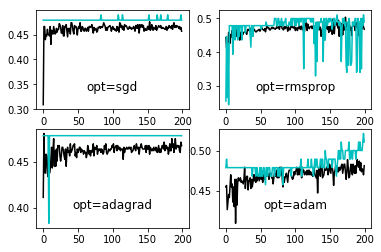

In [27]:
# Tuning Optimizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras import backend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df      = pd.read_excel('F://University/DeepLearning/Session1/PersonalDataset/main1.xlsx',header = 0)
	y       = df['target']
	x       = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x       = np.array(x)
	y       = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.15))
	#  Preprocess input data
	#x_train = np.array(x_train_original)
	#x_test  = np.array(x_test_original)
	trainX  = x_train.astype('float32')
	testX   = x_test.astype('float32')
	#x_train = preprocessing.scale(x_train)
	#x_test  = preprocessing.scale(x_test)
	#  Preprocess class labels
	#trainX  = x_train/5
	#testX   = x_test/5
	trainy  = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy   = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
    # fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
	# define model

	model = Sequential()
	model.add(Dense(10, activation='relu', input_dim=8))
	model.add(Dense(12, activation='relu'))
	#model.add(Dropout(0.2))
	#model.add(Dense(11, activation='relu'))
	model.add(Dense(100,activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(50,activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	plt.plot(history.history['accuracy'],color ='xkcd:Black', label='train')
	plt.plot(history.history['val_accuracy'],color='c', label='test')
	plt.title('opt='+optimizer, pad=-80)
    # prepare dataset
trainX, trainy, testX, testy = prepare_data()
    # create learning curves for different optimizers
momentums   = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for an optimizer
	fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
plt.show()

In [ ]:
# Tuning the Learning Rate
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df = pd.read_excel('E://University/DeepLearning/Session1/PersonalDataset/main.xlsx',header = 0)
	y = df['target']
	x = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x = np.array(x)
	y = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.15))
	# 3. Preprocess input data
	x_train = np.array(x_train_original)
	x_test = np.array(x_test_original)
	trainX = x_train.astype('float32')
	testX = x_test.astype('float32')
	x_train = preprocessing.scale(x_train)
	x_test  = preprocessing.scale(x_test)
	# 4. Preprocess class labels
	trainy = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(200, activation='relu', input_dim=8))
	model.add(Dense(100, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(60, activation='relu'))
	model.add(Dense(100,activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(200,activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=lrate), metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'],color ='xkcd:Black', label='train')
	pyplot.plot(history.history['val_accuracy'],color='c', label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

In [ ]:
# Tuning the Learning Rate
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df = pd.read_excel('E://University/DeepLearning/Session1/PersonalDataset/Book1.xlsx',header = 0)
	y = df['target']
	x = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x = np.array(x)
	y = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.2))
	# 3. Preprocess input data
	x_train = np.array(x_train_original)
	x_test = np.array(x_test_original)
	trainX = x_train.astype('float32')
	testX = x_test.astype('float32')
	x_train = preprocessing.scale(x_train)
	x_test  = preprocessing.scale(x_test)
	# 4. Preprocess class labels
	trainy = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
	# define model
	#model = Sequential()
	#model.add(Dense(250, activation='relu', input_dim=8))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(100, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(5, activation='softmax'))
	model   = Sequential()
	model.add(Dense(26, activation='relu', input_dim=8)) # , kernel_initializer='he_uniform'
	model.add(Dense(50, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(20, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(40, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(65, activation='relu'))
	model.add(Dropout(0.4))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01,decay=decay), metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('decay='+str(decay), pad=-80)
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a decay rate
	fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()

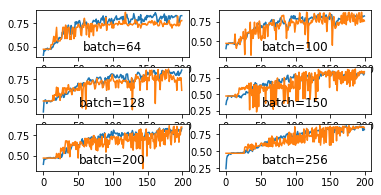

In [48]:
## Tuning the batch size
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df = pd.read_excel('E://University/DeepLearning/Session1/PersonalDataset/Book1.xlsx',header = 0)
	y = df['target']
	x = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x = np.array(x)
	y = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.2))
	# 3. Preprocess input data
	x_train = np.array(x_train_original)
	x_test = np.array(x_test_original)
	trainX = x_train.astype('float32')
	testX = x_test.astype('float32')
	x_train = preprocessing.scale(x_train)
	x_test  = preprocessing.scale(x_test)
	# 4. Preprocess class labels
	trainy = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	# define model
	#model = Sequential()
	#model.add(Dense(250, activation='relu', input_dim=8))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(100, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(5, activation='softmax'))
	model   = Sequential()
	model.add(Dense(26, activation='relu', input_dim=8)) # , kernel_initializer='he_uniform'
	model.add(Dense(50, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(20, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(40, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(65, activation='relu'))
	model.add(Dropout(0.4))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=n_batch)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)
    # prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
batch_sizes = [5, 10,20,30]
for i in range(len(batch_sizes)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(trainX, trainy, testX, testy, batch_sizes[i])
# show learning curves
pyplot.show()

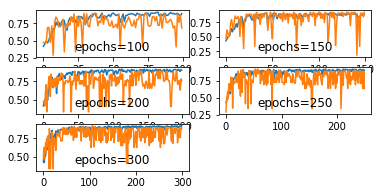

In [14]:
#Tuning Activation
## Tuning the batch size
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df = pd.read_excel('E://University/DeepLearning/Session1/PersonalDataset/Book1.xlsx',header = 0)
	y = df['target']
	x = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x = np.array(x)
	y = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.2))
	# 3. Preprocess input data
	x_train = np.array(x_train_original)
	x_test = np.array(x_test_original)
	trainX = x_train.astype('float32')
	testX = x_test.astype('float32')
	x_train = preprocessing.scale(x_train)
	x_test  = preprocessing.scale(x_test)
	# 4. Preprocess class labels
	trainy = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy,epochs):
	# define model
	#model = Sequential()
	#model.add(Dense(250, activation='relu', input_dim=8))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(100, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(5, activation='softmax'))
	model = Sequential()
	model.add(Dense(150, activation='relu', input_dim=8))
	model.add(Dense(100, activation='relu'))
	model.add(Dropout(0.3))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(200, activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	plt.plot(history.history['accuracy'], label='train')
	plt.plot(history.history['val_accuracy'], label='test')
	plt.title('opt='+optimizer, pad=-80)
    # prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
epochs = [100,150,200,250,300]
for i in range(len(epochs)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a batch size
	fit_model(trainX, trainy, testX, testy, epochs[i])
# show learning curves
pyplot.show()

In [ ]:
## Tuning init_mode 
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	df = pd.read_excel('E://University/DeepLearning/Session1/PersonalDataset/Book1.xlsx',header = 0)
	y = df['target']
	x = df[['leader1','culture1','communication1','Teamworking1',
	       'leader2'   ,'culture2' ,'communication2','Teamworking2']]
	x = np.array(x)
	y = np.array(y)
	x_train_original, x_test_original, y_train_original, y_test_original = np.squeeze(train_test_split(x, y ,test_size=0.2))
	# 3. Preprocess input data
	x_train = np.array(x_train_original)
	x_test = np.array(x_test_original)
	trainX = x_train.astype('float32')
	testX = x_test.astype('float32')
	x_train = preprocessing.scale(x_train)
	x_test  = preprocessing.scale(x_test)
	# 4. Preprocess class labels
	trainy = keras.utils.to_categorical(y_train_original, num_classes=5)
	testy = keras.utils.to_categorical(y_test_original, num_classes=5)
	return trainX, trainy, testX, testy
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy,init_mode):
	# define model
	#model = Sequential()
	#model.add(Dense(250, activation='relu', input_dim=8))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(100, activation='relu'))
	#model.add(Dropout(0.5))
	#model.add(Dense(200, activation='relu'))
	#model.add(Dense(5, activation='softmax'))
	model = Sequential()
	model.add(Dense(150, activation='relu', input_dim=8,kernel_initializer=init_mode))
	model.add(Dense(100,kernel_initializer=init_mode, activation='relu'))
	model.add(Dropout(0.3))
	model.add(Dense(100, kernel_initializer=init_mode,activation='relu'))
	model.add(Dense(50, kernel_initializer=init_mode,activation='relu'))
	model.add(Dropout(0.2))
	model.add(Dense(200, kernel_initializer=init_mode,activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01,decay=0.0001), metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=epochs, verbose=0, batch_size=20)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('init_mode='+str(init_mode), pad=-40)
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different batch sizes
init_mode = ['uniform',  'normal']

for i in range(len(init_mode)):
	# determine the plot number
	plot_no = 220 + (i+1)
	plt.subplot(plot_no)
	# fit model and plot learning curves for an optimizer
	fit_model(trainX, trainy, testX, testy,init_mode[i])
# show learning curves
plt.show()